# FASTER - RCNN IMPLEMENTATION

In [ ]:
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
object_detection_model = fasterrcnn_resnet50_fpn(pretrained=True)
object_detection_model.eval();

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 105MB/s] 


In [ ]:
test_img = Image.open("/content/test_img1.jpeg")

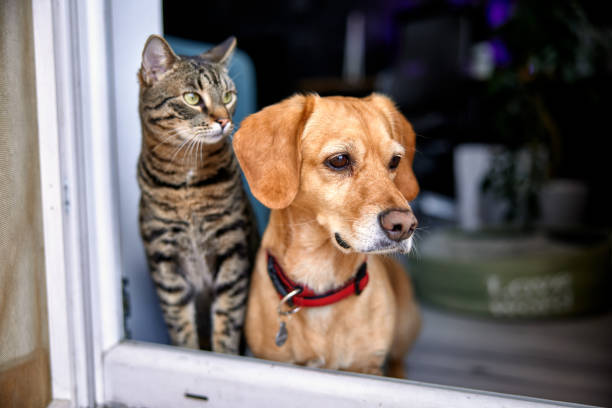

In [ ]:
test_img

In [ ]:
width, height = test_img.size
print(f"The dimensions of the image are {width}x{height}")

The dimensions of the image are 612x408


In [ ]:
# width, height = test_img1.size
# print(f"The dimension of the images are {width}x{height}")

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

#Apply the transformation to the image
test_img_tensor = transform(test_img)
test_img_tensor

tensor([[[0.3451, 0.3608, 0.3647,  ..., 0.0039, 0.0039, 0.0039],
         [0.3569, 0.3725, 0.3725,  ..., 0.0039, 0.0039, 0.0039],
         [0.3529, 0.3686, 0.3725,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.2863, 0.2980, 0.3098,  ..., 0.1216, 0.1176, 0.1137],
         [0.2863, 0.2980, 0.3098,  ..., 0.1216, 0.1176, 0.1137],
         [0.2863, 0.3020, 0.3098,  ..., 0.1216, 0.1176, 0.1137]],

        [[0.3216, 0.3373, 0.3373,  ..., 0.0039, 0.0039, 0.0039],
         [0.3333, 0.3490, 0.3451,  ..., 0.0039, 0.0039, 0.0039],
         [0.3294, 0.3451, 0.3451,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.1922, 0.1961, 0.2078,  ..., 0.0980, 0.0941, 0.0902],
         [0.1922, 0.1961, 0.2078,  ..., 0.0980, 0.0941, 0.0902],
         [0.1922, 0.2000, 0.2078,  ..., 0.0980, 0.0941, 0.0902]],

        [[0.2745, 0.2902, 0.2980,  ..., 0.0039, 0.0039, 0.0039],
         [0.2863, 0.3020, 0.3059,  ..., 0.0039, 0.0039, 0.0039],
         [0.2824, 0.2980, 0.3059,  ..., 0.0039, 0.0039, 0.

In [ ]:
test_img_tensor.shape

torch.Size([3, 408, 612])

In [ ]:
# Add the batch data dim. This is added because models work on batches of images
test_img_tensor = test_img_tensor.unsqueeze(dim=0)
test_img_tensor.shape

torch.Size([1, 3, 408, 612])

In [ ]:
preds = object_detection_model(test_img_tensor)
preds

[{'boxes': tensor([[233.1602,  90.1161, 431.7190, 378.3868],
          [132.6686,  28.4825, 266.2517, 372.5305],
          [132.4319,  33.1351, 265.7533, 358.0821],
          [165.9607,  50.4178, 391.7910, 377.0104],
          [ 91.6329, 339.3947, 577.6118, 404.5926],
          [110.4094,  15.6220, 365.4837, 386.3338],
          [ 75.3653,  43.4748, 465.1440, 384.1267],
          [449.6492, 138.6353, 511.3659, 230.7051],
          [100.3299, 336.6239, 575.0822, 403.4710],
          [ 76.5190, 311.2625, 602.2323, 406.8243],
          [ 86.3867,  53.3879, 464.1670, 401.0291],
          [432.8774,  57.3134, 553.9104, 231.8739],
          [ 58.9643, 189.5840, 603.5836, 405.9199]], grad_fn=<StackBackward0>),
  'labels': tensor([18, 17, 24, 17, 81, 62, 15, 62,  3, 15, 63,  1, 15]),
  'scores': tensor([0.9957, 0.9864, 0.4003, 0.1255, 0.1179, 0.1073, 0.1053, 0.0720, 0.0707,
          0.0690, 0.0686, 0.0583, 0.0542], grad_fn=<IndexBackward0>)}]

###Visualize the results

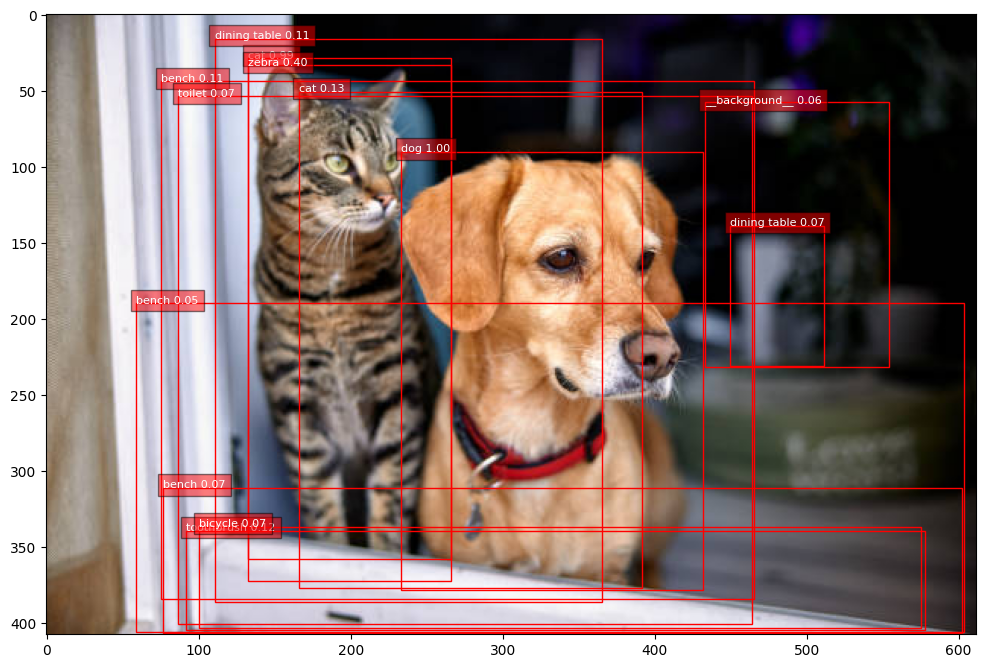

In [ ]:
#Convert the tensr back to the numpy for visualization

COCO_INSTANCE_LABEL_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane',
'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

img = test_img_tensor.squeeze().detach().cpu().numpy() # Adjust dimesnions
img  = img.transpose(1,2,0) # Rearrange the dimensions from CxHxW for
CONFIDENCE_THRESHOLD = 0.8
#create figure and axis
fig, ax = plt.subplots(1, figsize=(12,9))

# Display the image
ax.imshow(img)
for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'],
                             preds[0]['scores']):
  x1, y1, x2, y2 = box.detach().cpu().numpy() # Make sure to detach and
  label_name = COCO_INSTANCE_LABEL_NAMES[label.item()]
  rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1,
                           edgecolor='r', facecolor='none')
  ax.add_patch(rect)
  plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white',
           fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

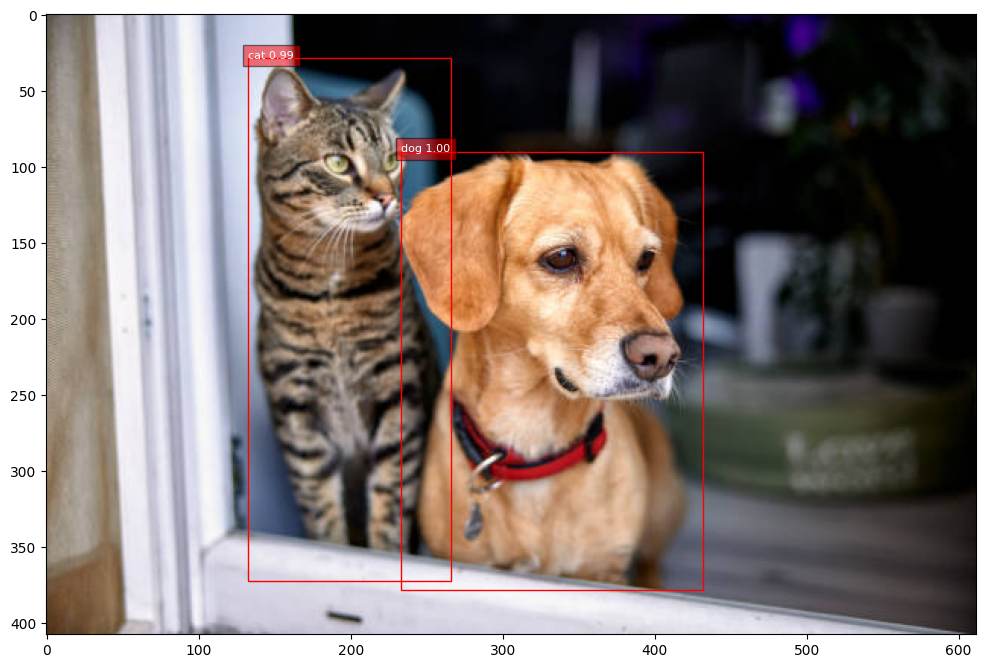

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,9))

# Display the image
ax.imshow(img)
for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'],
                             preds[0]['scores']):
  if score.item() > CONFIDENCE_THRESHOLD:
    x1, y1, x2, y2 = box.detach().cpu().numpy()
    label_index = label.item()
    label_name = COCO_INSTANCE_LABEL_NAMES[label.item()]
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1,
                            edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white',
            fontsize=8, bbox=dict(facecolor='red', alpha=0.5))